# Methodology
## Data Sources
<details>
<summary>The analysis utilizes two primary datasets:</summary>
  <ul>
    <li>`IRENA_OFGStats_mw.cleaned.xlsx` : Contains data on off-grid solar PV capacity
 in Megawatts (MW), including various solar PV technologies.</li>
    <li>`IRENA_OFGStats_thousands.cleaned.xlsx` : Contains data on the number of
 people connected to off-grid solar PV systems in thousands, covering different</li>
  </ul>
 </details>
<p><strong>social impact technologies</strong></p>
 Both datasets include a 'Conflict Status' column, which categorizes regions/countries
 as either 'Conflict' or 'No Conflict' for each given year. The data spans from 
 2000 to 2025

## Analytical approach
<details>
<summary>The analysis was conducted using Python with the pandas, matplotlib, and seaborn
 libraries. The approach involved:</summary>
<ul>
    <li>Data Exploration: Initial examination of both datasets to understand their
 structure, unique values, and overall distributions. This confirmed the presence
 of 'Conflict Status' and 'Technology' columns crucial for the analysis.</li>
    <li>Environmental Impact Analysis: Focused on the
 IRENA_OFGStats_mw.cleaned.xlsx dataset. Solar PV capacity trends were
 analyzed over time, comparing 'Conflict' and 'No Conflict' regions. Average
 capacities per country and regional deployment patterns were also examined.</li>
    <li>Social Impact Analysis: Focused on the
 IRENA_OFGStats_thousands.cleaned.xlsx dataset. Trends in the number of
 people connected to solar PV systems were analyzed, comparing 'Conflict' and
 'No Conflict' regions. Average connections per country and regional social impact
 were also assessed.</li>
    <li>Comparative Analysis and Visualization: Generated line plots to visualize
 trends over time and bar charts. These visualizations
 highlight the differential impacts of conflict on solar PV deployment and
 consumption.</li>
 <ul>
</details>

# Environmental Impact Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
mw = pd.read_excel(
    "C:/Users/m_osm/Desktop/CDSP/ET6-CDSP-group-08-repo/1_datasets/cleaned_data/IRENA_OFGStats_mw.cleaned.xlsx",
    sheet_name="Cleaned_data",
)
thousands = pd.read_excel(
    "C:/Users/m_osm/Desktop/CDSP/ET6-CDSP-group-08-repo/1_datasets/cleaned_data/IRENA_OFGStats_thousands.cleaned.xlsx",
    sheet_name="Cleaned_data",
)

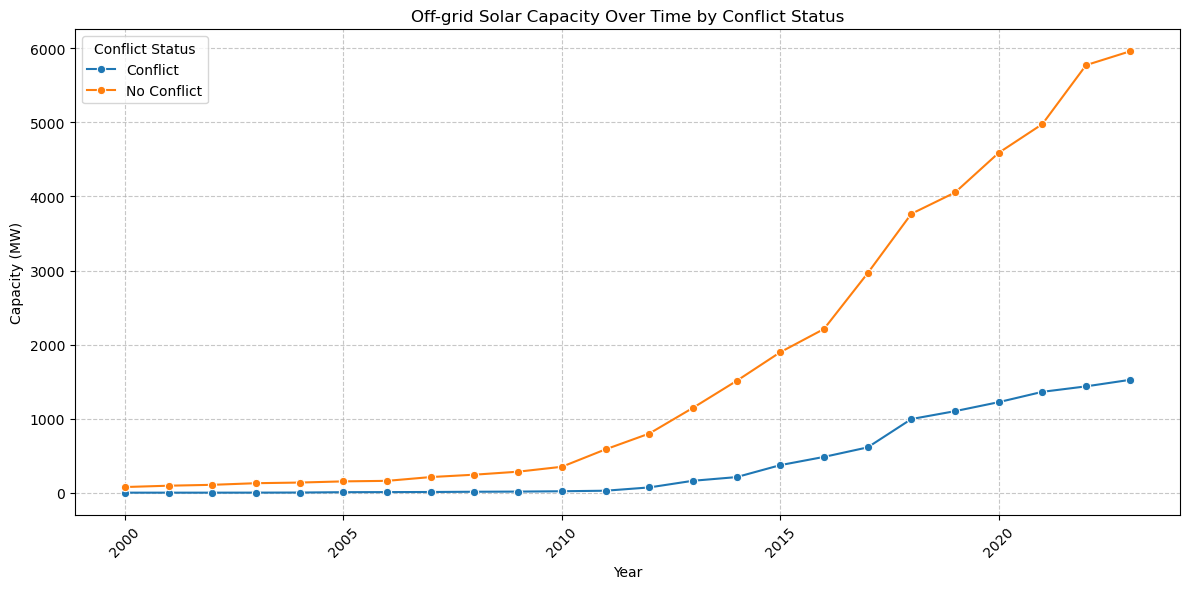

In [11]:
# Group the data by Year and Conflict Status, and calculate the sum of Values
solar_capacity = (
    mw[mw["Group Technology"] == "Solar energy"]
    .groupby(["Year", "Conflict Status"])["Value"]
    .sum()
    .reset_index()
)

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=solar_capacity, x="Year", y="Value", hue="Conflict Status", marker="o"
)

# Customize the plot
plt.title("Off-grid Solar Capacity Over Time by Conflict Status")
plt.xlabel("Year")
plt.ylabel("Capacity (MW)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.xticks(rotation=45)
plt.legend(title="Conflict Status")

plt.tight_layout()
plt.show()

countries not affected by conflict (No Conflict) consistently show a significantly higher and more rapidly increasing off-grid solar capacity compared to conflict-affected countries. While both categories show an upward trend, the growth in non-conflict regions is substantially steeper, indicating a much larger scale of deployment. Conflict regions, although showing some growth, maintain a much lower overall capacity throughout the period.

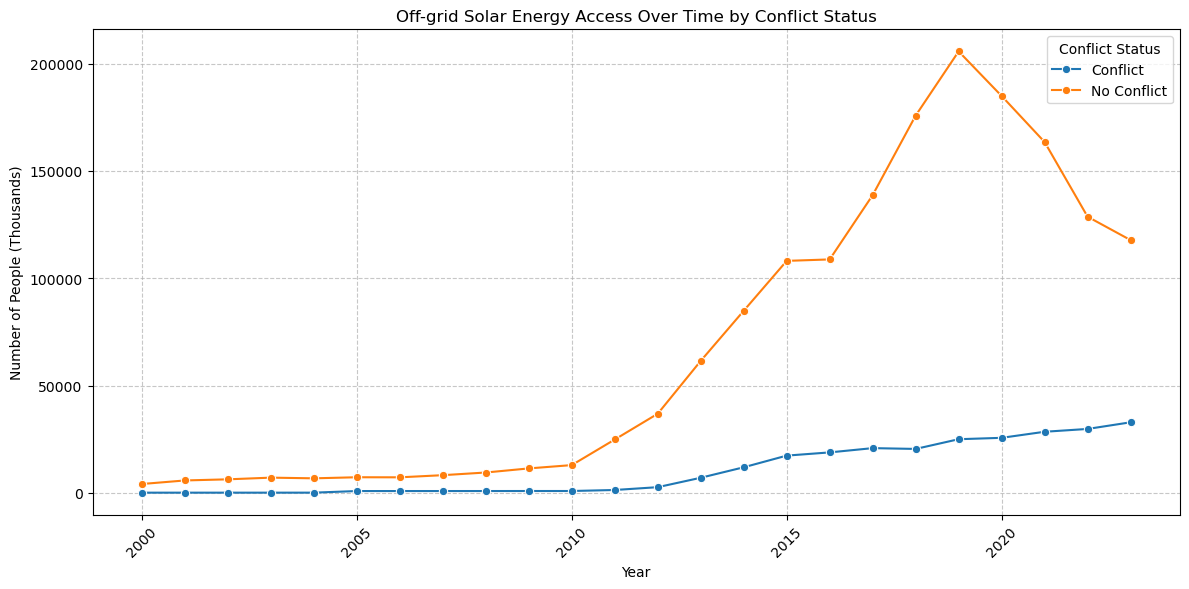

In [12]:
# Filter solar energy access data
solar_access = (
    thousands[thousands["Group Technology"] == "Solar energy"]
    .groupby(["Year", "Conflict Status"])["Value"]
    .sum()
    .reset_index()
)

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=solar_access, x="Year", y="Value", hue="Conflict Status", marker="o")

# Customize the plot
plt.title("Off-grid Solar Energy Access Over Time by Conflict Status")
plt.xlabel("Year")
plt.ylabel("Number of People (Thousands)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.xticks(rotation=45)
plt.legend(title="Conflict Status")

plt.tight_layout()
plt.show()

This chart depicts the off-grid solar energy access (in thousands of people) over the same period. Similar to capacity, energy access is considerably higher in non-conflict regions. The trend for non-conflict areas shows a strong increase until around 2019, followed by a slight decline in recent years. In contrast, conflict-affected regions show a slow but steady increase in energy access, albeit at a much lower magnitude than non-conflict regions. This suggests that while efforts are being made to provide energy access in conflict zones, the scale and pace are limited compared to more stable environments.

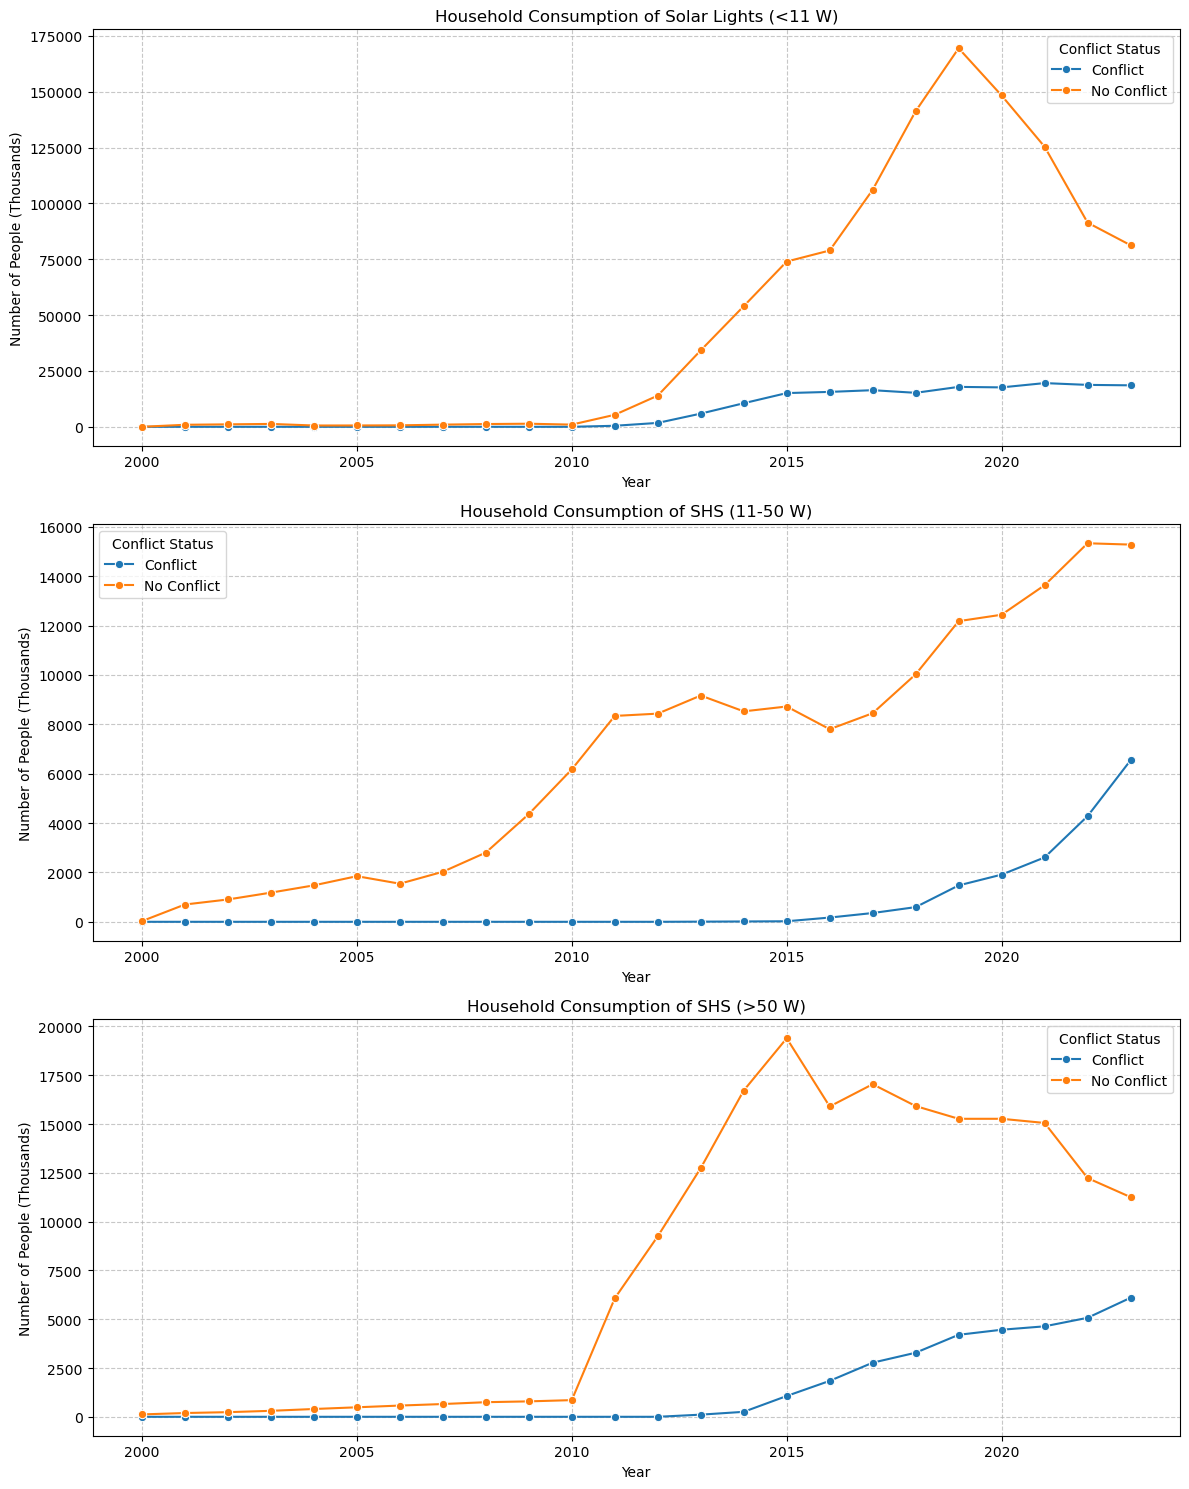

In [13]:
# Filter data for different solar technologies
solar_lights = (
    thousands[thousands["Technology"] == "Number of people using solar lights (<11 W)"]
    .groupby(["Year", "Conflict Status"])["Value"]
    .sum()
    .reset_index()
)
solar_shs_small = (
    thousands[thousands["Technology"] == "Number of people using SHS (11-50 W)"]
    .groupby(["Year", "Conflict Status"])["Value"]
    .sum()
    .reset_index()
)
solar_shs_large = (
    thousands[thousands["Technology"] == "Number of people using SHS (>50 W)"]
    .groupby(["Year", "Conflict Status"])["Value"]
    .sum()
    .reset_index()
)

# Create the figure with subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))

# Plot for solar lights
sns.lineplot(
    data=solar_lights, x="Year", y="Value", hue="Conflict Status", marker="o", ax=ax1
)
ax1.set_title("Household Consumption of Solar Lights (<11 W)")
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of People (Thousands)")
ax1.grid(True, linestyle="--", alpha=0.7)

# Plot for small SHS
sns.lineplot(
    data=solar_shs_small, x="Year", y="Value", hue="Conflict Status", marker="o", ax=ax2
)
ax2.set_title("Household Consumption of SHS (11-50 W)")
ax2.set_xlabel("Year")
ax2.set_ylabel("Number of People (Thousands)")
ax2.grid(True, linestyle="--", alpha=0.7)

# Plot for large SHS
sns.lineplot(
    data=solar_shs_large, x="Year", y="Value", hue="Conflict Status", marker="o", ax=ax3
)
ax3.set_title("Household Consumption of SHS (>50 W)")
ax3.set_xlabel("Year")
ax3.set_ylabel("Number of People (Thousands)")
ax3.grid(True, linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

The adoption of solar lighting and Solar Home Systems (SHS) reveals distinct patterns when comparing non-conflict and conflict regions, reflecting the unique energy challenges and solutions in these areas. For solar lights with a capacity of less than 11 W, non-conflict regions have seen significantly higher usage, with a peak around 2019 followed by a decline. In contrast, conflict regions have experienced a steady, though gradual, rise in the use of these small solar lights, underscoring their critical role as a reliable and accessible energy solution where other options are limited. 

For Solar Home Systems with capacities between 11 and 50 W, household consumption in non-conflict regions has been generally higher but fluctuates, with a noticeable uptick in recent years. Meanwhile, conflict regions started with very low adoption but have shown a marked increase in usage since around 2018. This surge suggests a growing dependence on these smaller SHS, likely driven by the lack of access to larger grid-based solutions in these areas. 

Similarly, for larger SHS with capacities exceeding 50 W, non-conflict regions have consistently had more users, peaking around 2015 before declining. In conflict regions, however, there’s been a slow but steady rise in the adoption of these more robust systems. This trend points to ongoing efforts to bring stronger off-grid energy solutions to challenging environments, where reliable power is often scarce but increasingly vital.

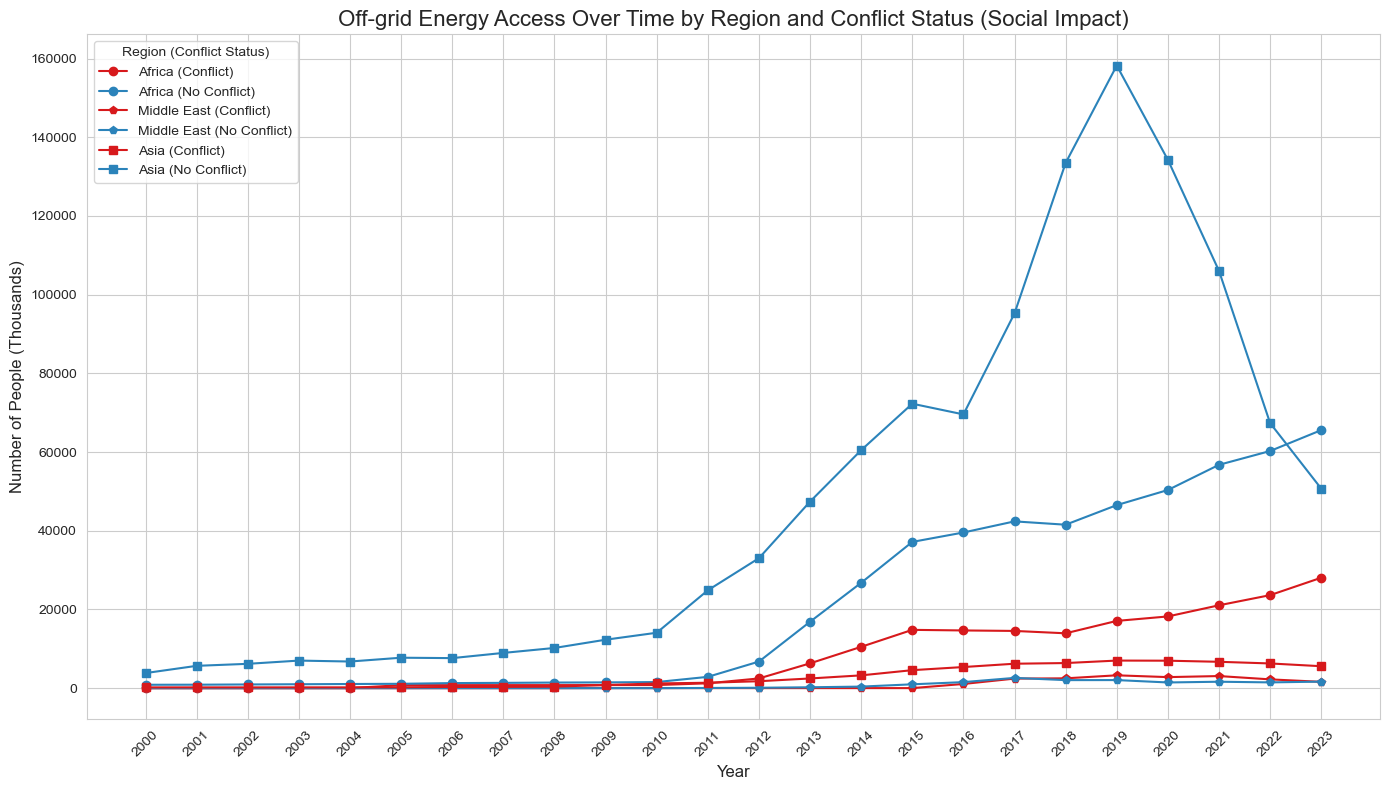

In [18]:
# Filter the data for the regions of interest
regions_of_interest = ["Africa", "Middle East", "Asia"]
regional_access = thousands[thousands["Region"].isin(regions_of_interest)]

# Group by Year, Region, and Conflict Status, then sum the values
regional_access = (
    regional_access.groupby(["Year", "Region", "Conflict Status"])["Value"]
    .sum()
    .reset_index()
)

# Define markers for each region
markers = {
    "Africa": "o",
    "Asia": "s",
    "Americas": "^",
    "Oceania": "D",
    "Central America and the Caribbean": "v",
    "Middle East": "p",
    "South America": "*",
}

# Define colors for conflict status
colors = {"No Conflict": "#2b83ba", "Conflict": "#d7191c"}

# Create the plot
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Plotting each region with different markers
for region in regions_of_interest:
    region_data = regional_access[regional_access["Region"] == region]
    for status in region_data["Conflict Status"].unique():
        status_data = region_data[region_data["Conflict Status"] == status]
        plt.plot(
            status_data["Year"],
            status_data["Value"],
            marker=markers[region],
            linestyle="-",
            color=colors[status],
            label=f"{region} ({status})",
        )

# Customize the plot
plt.title(
    "Off-grid Energy Access Over Time by Region and Conflict Status (Social Impact)",
    fontsize=16,
)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of People (Thousands)", fontsize=12)
plt.xticks(status_data["Year"].unique(), rotation=45)
plt.legend(title="Region (Conflict Status)", fontsize=10)
plt.tight_layout()
plt.show()

Zooming out to a regional perspective, Africa, Asia, and the Middle East stand out as the areas with the most significant off-grid energy access, both in conflict and non-conflict settings. Within each region, non-conflict areas generally enjoy greater energy access. However, even in conflict-affected regions, there is a persistent, though slower, increase in energy access. This steady progress underscores the resilience and critical importance of off-grid solutions in providing power to communities facing difficult circumstances, where reliable energy can make a transformative difference.

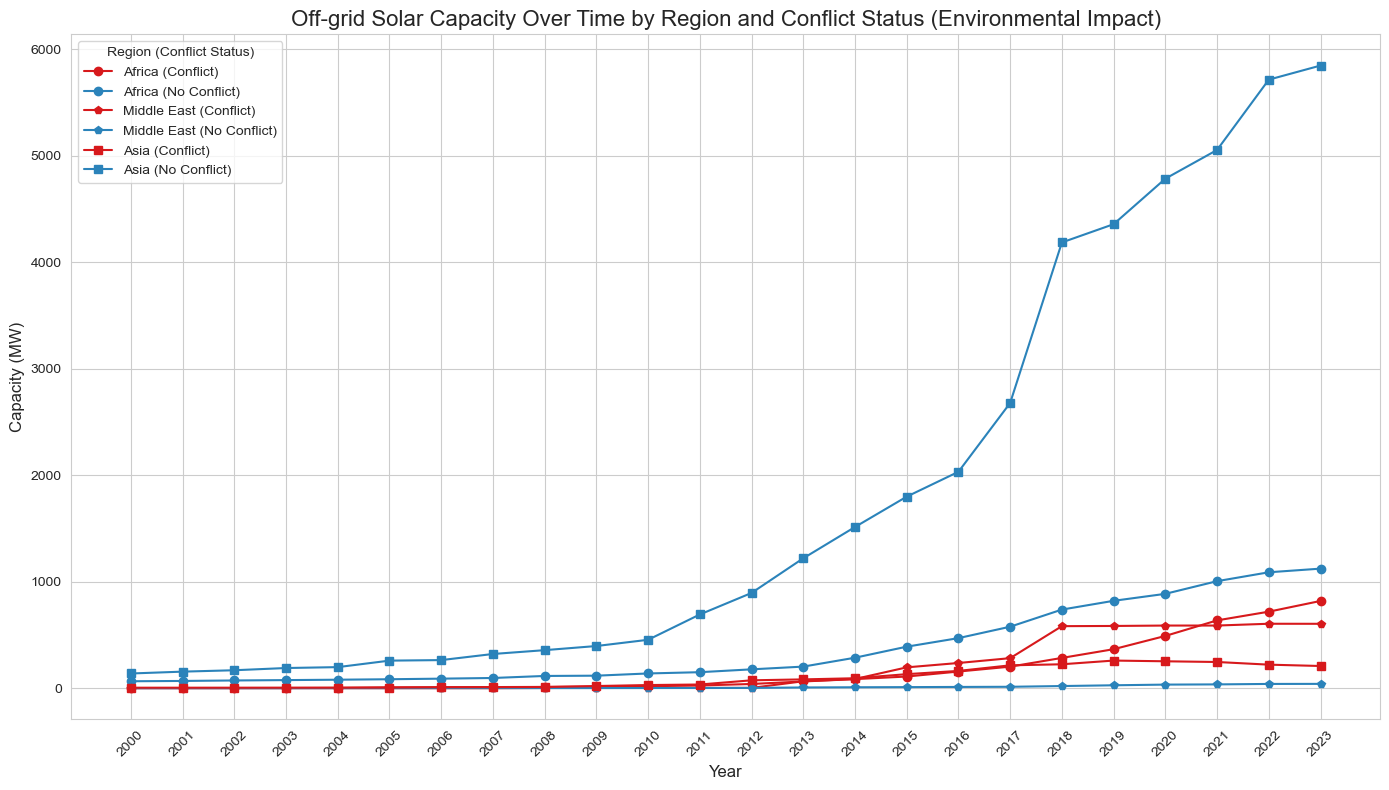

In [19]:
# Filter the data for the regions of interest
regions_of_interest = ["Africa", "Middle East", "Asia"]
regional_capacity = mw[mw["Region"].isin(regions_of_interest)]

# Group by Year, Region, and Conflict Status, then sum the values
regional_capacity = (
    regional_capacity.groupby(["Year", "Region", "Conflict Status"])["Value"]
    .sum()
    .reset_index()
)

# Define markers for each region
markers = {
    "Africa": "o",
    "Asia": "s",
    "Americas": "^",
    "Oceania": "D",
    "Central America and the Caribbean": "v",
    "Middle East": "p",
    "South America": "*",
}

# Define colors for conflict status
colors = {"No Conflict": "#2b83ba", "Conflict": "#d7191c"}

# Create the plot
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Plotting each region with different markers
for region in regions_of_interest:
    region_data = regional_capacity[regional_capacity["Region"] == region]
    for status in region_data["Conflict Status"].unique():
        status_data = region_data[region_data["Conflict Status"] == status]
        plt.plot(
            status_data["Year"],
            status_data["Value"],
            marker=markers[region],
            linestyle="-",
            color=colors[status],
            label=f"{region} ({status})",
        )

# Customize the plot
plt.title(
    "Off-grid Solar Capacity Over Time by Region and Conflict Status (Environmental Impact)",
    fontsize=16,
)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Capacity (MW)", fontsize=12)
plt.xticks(status_data["Year"].unique(), rotation=45)
plt.legend(title="Region (Conflict Status)", fontsize=10)
plt.tight_layout()
plt.show()

This chart offers a clear view of off-grid solar capacity across different regions, highlighting the interplay between conflict status and sustainable energy adoption. Africa and Asia lead the way with the highest solar capacities, reflecting their significant role in the global shift toward renewable energy. Non-conflict regions across all continents consistently show a much stronger environmental impact, with greater solar capacity driving progress toward sustainability. Yet, even in conflict-affected areas, there’s a steady and inspiring rise in solar energy use. Despite the challenges of instability, these regions are increasingly embracing solar power, contributing to a greener future and showcasing the resilience of communities in adopting sustainable solutions.

# Comparative analysis

## Overall Trends and Disparities
 Across both environmental (capacity in MW) and social (people connected in
 thousands) metrics, a consistent pattern emerges: non-conflict regions exhibit
 significantly higher levels of solar PV deployment and adoption compared to conflict
affected regions. This disparity is evident in:
 Growth Trajectories: Non-conflict areas show a steeper and more consistent
 upward trend in both solar PV capacity and the number of people connected.
 This suggests that stable political and economic environments are crucial for
 fostering the rapid growth of renewable energy infrastructure and its widespread
 adoption.
 Scale of Deployment: The average capacity per country and the overall
 distribution of values indicate that larger-scale solar PV projects and more
 extensive energy access programs are predominantly found in non-conflict
 zones. In conflict areas, deployments tend to be smaller and more fragmented,
 often focusing on immediate needs rather than long-term, comprehensive
 solutions
## Regional Vulnerabilities and Resilience
 While some regions, such as Asia and Africa, show substantial solar PV activity in both
 conflict and non-conflict settings, the proportion of deployment and connections in
 non-conflict areas is overwhelmingly higher. This highlights the vulnerability of energy
 infrastructure and access initiatives to armed conflicts. However, the presence of solar
 PV in conflict zones, even at a reduced scale, also points to the resilience of
 communities and the potential for decentralized renewable energy solutions to
 provide critical services in challenging environments.
## Interconnectedness of Environmental and Social Impacts
 The analysis reveals a strong interconnectedness between the environmental and
 social impacts. Limited solar PV capacity in conflict zones directly translates to fewer
 people having access to clean energy. This means that the environmental benefits of
 reduced reliance on fossil fuels are constrained, and the social benefits of improved
 health, education, and economic opportunities are not fully realized. Armed conflicts
 create a vicious cycle where instability hinders sustainable energy development,
 which in turn perpetuates energy poverty and exacerbates humanitarian challenges